In [1]:
%matplotlib inline

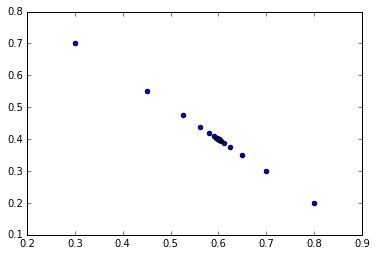

In [2]:
import matplotlib.pyplot as plot
import numpy as np

A = np.matrix([[0.8, 0.3], [0.2, 0.7]])
u_0 = np.matrix([[1], [0]])
v_0 = np.matrix([[0], [1]])

x_values = range(1, 11)
u_values = [A ** n * u_0 for n in x_values]
v_values = [A ** n * v_0 for n in x_values]

u_x, u_y = zip(*u_values)
v_x, v_y = zip(*v_values)

def clean(values):
    return [x[0, 0] for x in values]

plot.scatter(clean(u_x), clean(u_y), label='Starting from [1, 0]')
plot.scatter(clean(v_x), clean(v_y), label='Starting from [0, 1]')

In [3]:
E = np.matrix([[1, 0, 0, 0], [-1, 1, 0, 0], [0, -1, 1, 0], [0, 0, -1, 1]])
P = np.matrix([[1, 0, 0, 0], [1, 1, 0, 0], [1, 2, 1, 0], [1, 3, 3, 1]])
E * P

matrix([[1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 1, 1, 0],
        [0, 1, 2, 1]])

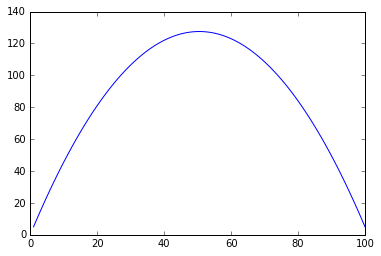

In [23]:
K_fixed_fixed = np.zeros((100, 100))
for i in xrange(100):
    if i > 0:
        K_fixed_fixed[i][i - 1] = -1
    K_fixed_fixed[i][i] = 2
    if i < 99:
        K_fixed_fixed[i][i + 1] = -1
        
K_fixed_fixed_inv = np.linalg.inv(K_fixed_fixed)
f = np.matrix([0.1 for _ in xrange(100)]).T
u_fixed_fixed = K_fixed_fixed_inv * f

plot.plot(range(1, 101), u_fixed_fixed)

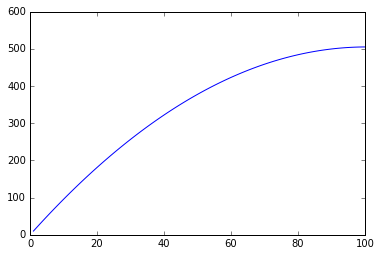

In [24]:
K_fixed_free = np.copy(K_fixed_fixed)
K_fixed_free[99][99] = 1

K_fixed_free_inv = np.linalg.inv(K_fixed_free)
f = np.matrix([0.1 for _ in xrange(100)]).T
u_fixed_free = K_fixed_free_inv * f

plot.plot(range(1, 101), u_fixed_free)